<a href="https://colab.research.google.com/github/ssaurabh-iimbg/pythonCode/blob/main/Faculty_Smart_Campus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Faculty_Smart_Campus - Sheet1.csv to Faculty_Smart_Campus - Sheet1.csv


In [ ]:
import pandas as pd
data = pd.read_csv('Faculty_Smart_Campus - Sheet1.csv')

In [ ]:
print(data)

   Learning and Teaching Infrastructure and Operations  \
0                   Best                          Best   
1                   Best                        Better   
2                   Best                          Good   
3                 Better                          Best   
4                   Best                          Best   
5                 Better                        Better   
6                 Better                          Good   
7                   Best                        Better   
8                   Good                        Better   
9                 Better                        Better   
10                  Best                          Good   
11                Better                        Better   
12                  Good                        Better   
13                Better                          Good   
14                  Best                          Good   
15                  Good                        Better   
16            

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data.columns = [col.replace(' ', '_').replace(',', '') for col in data.columns]

model_formula = 'Rating ~ C(Learning_and_Teaching) + C(Infrastructure_and_Operations) + C(Governance_and_Administration) + C(Student_Life_and_Engagement) + C(Sustainability_and_Environmental_Responsibility) + C(Cost)'

model_fit = smf.ols(model_formula, data=data).fit()

print(model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     6.445
Date:                Tue, 12 Mar 2024   Prob (F-statistic):            0.00373
Time:                        15:51:06   Log-Likelihood:                -48.980
No. Observations:                  20   AIC:                             118.0
Df Residuals:                      10   BIC:                             127.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [ ]:
conjoint_attributes = ['Learning_and_Teaching','Infrastructure_and_Operations','Governance_and_Administration','Student_Life_and_Engagement','Sustainability_and_Environmental_Responsibility','Cost']

In [ ]:
import numpy as np

level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1

for item in conjoint_attributes:
    nlevels = len(list(np.unique(data[item])))
    level_name.append(list(np.unique(data[item])))

    begin = end
    end = begin + nlevels - 1

    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1) * sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)

    part_worth_range.append(max(new_part_worth) - min(new_part_worth))

print("-------------------------------------------------------------")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)


Learning_and_Teaching
Infrastructure_and_Operations
Governance_and_Administration
Student_Life_and_Engagement
Sustainability_and_Environmental_Responsibility
Cost
-------------------------------------------------------------
level name:
[['Best', 'Better', 'Good'], ['Best', 'Better', 'Good'], ['Excellent', 'Good'], ['Excellent', 'Good'], ['Excellent', 'Good'], ['High', 'Low', 'Medium']]
npw with sum element:
[10.924266773804751, 8.556247488951387, -19.480514262756138]
imp level:
{'Learning_and_Teaching': 2, 'Infrastructure_and_Operations': 2, 'Governance_and_Administration': 1, 'Student_Life_and_Engagement': 1, 'Sustainability_and_Environmental_Responsibility': 1, 'Cost': 0}
part worth:
[[-4.453327976429652, -8.12883353421723, 12.582161510646882], [-5.352082496317106, -7.30326771126289, 12.655350207579996], [-7.6258202758805576, 7.6258202758805576], [-4.052899424132857, 4.052899424132857], [-4.981585643498057, 4.981585643498057], [10.924266773804751, 8.556247488951387, -19.480514262756

In [ ]:
attribute_importance = []
for i in part_worth_range:

    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[19.84, 19.12, 14.61, 7.76, 9.54, 29.12]


In [ ]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("    Relative importance of attribute ",attribute_importance[i])
    print("    Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("          {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        #print(j)
part_worth_dict

Attribute : Learning_and_Teaching
    Relative importance of attribute  19.84
    Level wise part worths: 
0
0
          Best:-4.453327976429652
0
1
          Better:-8.12883353421723
0
2
          Good:12.582161510646882
Attribute : Infrastructure_and_Operations
    Relative importance of attribute  19.12
    Level wise part worths: 
1
0
          Best:-5.352082496317106
1
1
          Better:-7.30326771126289
1
2
          Good:12.655350207579996
Attribute : Governance_and_Administration
    Relative importance of attribute  14.61
    Level wise part worths: 
2
0
          Excellent:-7.6258202758805576
2
1
          Good:7.6258202758805576
Attribute : Student_Life_and_Engagement
    Relative importance of attribute  7.76
    Level wise part worths: 
3
0
          Excellent:-4.052899424132857
3
1
          Good:4.052899424132857
Attribute : Sustainability_and_Environmental_Responsibility
    Relative importance of attribute  9.54
    Level wise part worths: 
4
0
          Excellent:-4.

{'Best': -5.352082496317106,
 'Better': -7.30326771126289,
 'Good': 4.981585643498057,
 'Excellent': -4.981585643498057,
 'High': 10.924266773804751,
 'Low': 8.556247488951387,
 'Medium': -19.480514262756138}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




Text(0, 0.5, 'Importance')

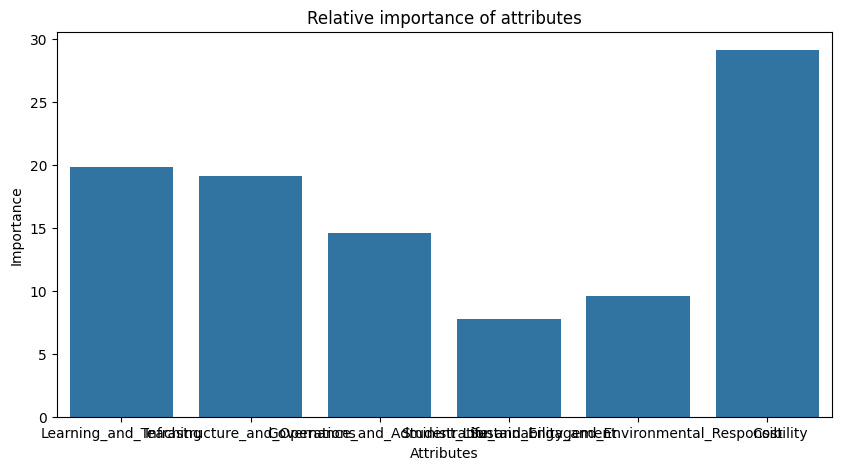

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

In [ ]:
utility = []
for i in range(data.shape[0]):
    score = part_worth_dict[data['Learning_and_Teaching'][i]]+part_worth_dict[data['Infrastructure_and_Operations'][i]] + part_worth_dict[data['Governance_and_Administration'][i]]+part_worth_dict[data['Student_Life_and_Engagement'][i]] + part_worth_dict[data['Sustainability_and_Environmental_Responsibility'][i]]+part_worth_dict[data['Cost'][i]]
    utility.append(score)

data['utility'] = utility
utility

[-45.12943618588452,
 0.8824829248694481,
 15.53535556448376,
 -27.154278826838077,
 5.201687424668597,
 -49.03180661577609,
 11.216151064684611,
 -27.154278826838077,
 1.2529797776884966,
 -18.6270255792152,
 3.204164992634281,
 -11.031873577072451,
 -36.74695326101514,
 3.620999062541861,
 3.204164992634281,
 11.216151064684611,
 -24.832596759073244,
 3.2505022097228125,
 8.894468996919779,
 -11.031873577072451]

In [ ]:
print("The profile that has the highest utility score :",'\n', data.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 Learning_and_Teaching                                   Best
Infrastructure_and_Operations                           Good
Governance_and_Administration                           Good
Student_Life_and_Engagement                             Good
Sustainability_and_Environmental_Responsibility    Excellent
Cost                                                    High
Rating                                                    65
utility                                            15.535356
Name: 2, dtype: object


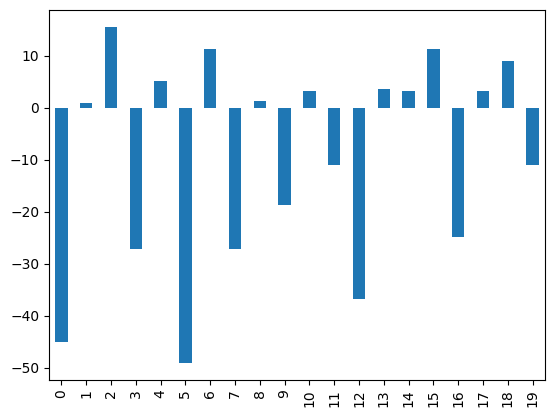

In [ ]:
data['utility'].plot.bar()
plt.show()

In [ ]:
for i,j in zip(attrib_level.keys(),range(0,len(conjoint_attributes))):

    print("Preferred level in {} is :: {}".format(i,level_name[j][important_levels[i]]))

Preferred level in Learning_and_Teaching is :: Good
Preferred level in Infrastructure_and_Operations is :: Good
Preferred level in Governance_and_Administration is :: Good
Preferred level in Student_Life_and_Engagement is :: Good
Preferred level in Sustainability_and_Environmental_Responsibility is :: Good
Preferred level in Cost is :: High
